In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13466089834534453328
 xla_global_id: -1]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [ ]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


### **Convolution**

In [ ]:
width = 64
height = 64

In [ ]:
model = Sequential() 

In [ ]:
# 1. Convolution
model.add(Conv2D(filters=64, kernel_size=3, input_shape= (width, height, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, input_shape= (64, 64, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, input_shape= (64, 64, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


In [ ]:
folders = glob('data/data_food_non_food/train/food/*')
len(folders)

In [ ]:
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu')) 
model.add(Dense(units=1, activation='sigmoid')) 


In [ ]:
# compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       2

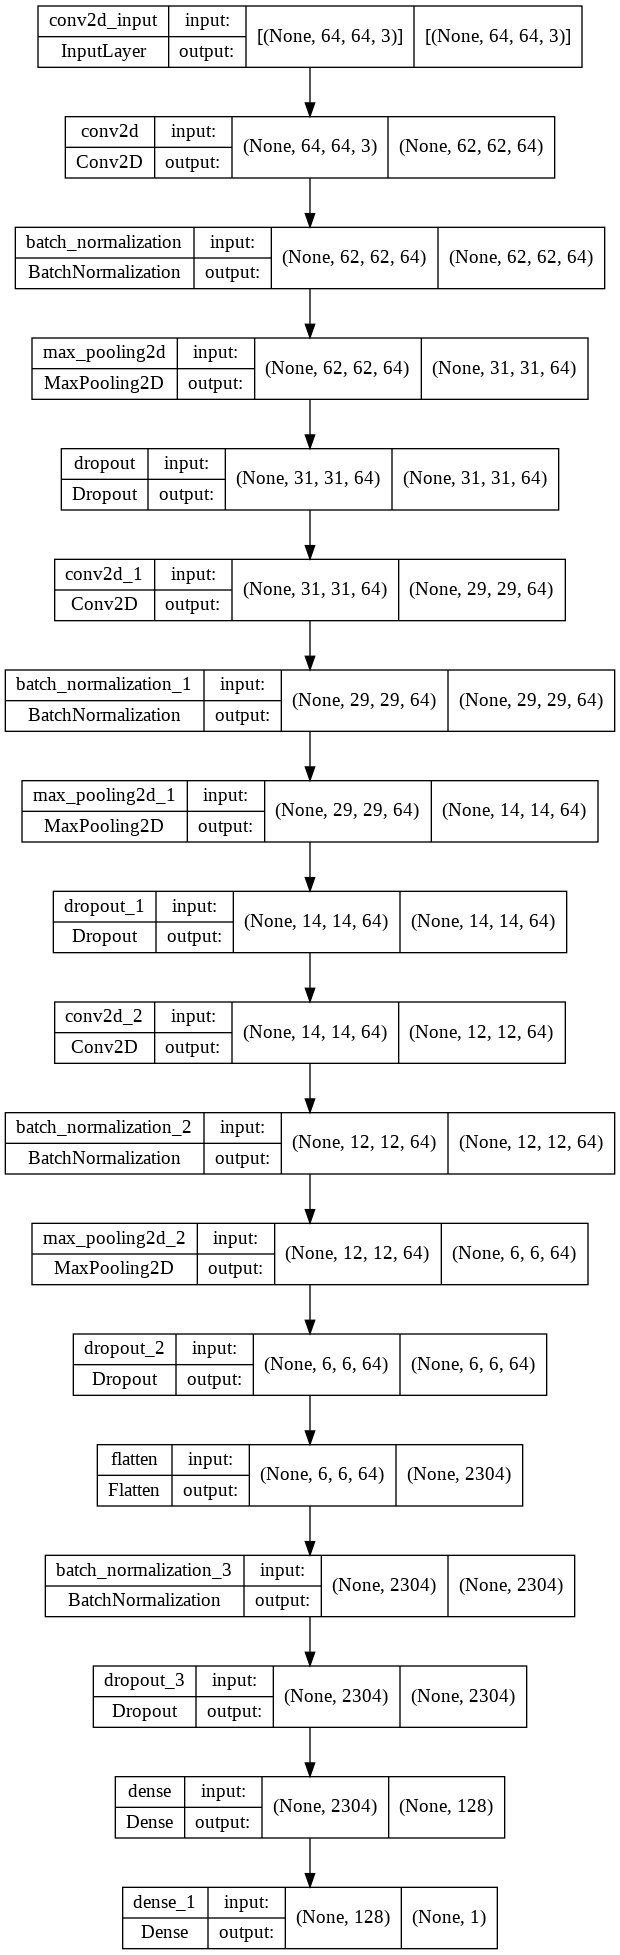

In [ ]:
plot_model(model, show_shapes=True)

### **Image Pre-Processing**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batchSize = 256

In [ ]:
training_set = train_datagen.flow_from_directory('data/data_food_non_food/train/',
                                                 target_size = (width, height),
                                                 batch_size = batchSize,
                                                 class_mode = 'binary')  # class_mode or label_mode

test_set = test_datagen.flow_from_directory('data/data_food_non_food/test',
                                                 target_size = (width, height),
                                                 batch_size = batchSize,
                                                 class_mode = 'binary')

Found 10001 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'food': 0, 'non_food': 1}

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=20, 
                                # monitor='val_loss', mode='min',
) 

model_check_point = ModelCheckpoint('LDS8_K275_DinhVietTrung_Cuoi_ky/model/model_checkpoint_food_non_food.h5', 
                                    monitor='val_acc',
                                    mode='max',
                                    save_best_only=True) 

In [ ]:
from datetime import datetime
t1 = datetime.now()
print(t1)

2022-06-04 17:04:42.277340


In [ ]:
# epochs=100: chạy lại với 100 lần
history = model.fit(training_set, 
                    validation_data=test_set, 
                    epochs=100, 
                    batch_size = batchSize,
                    callbacks=[early_stopping, model_check_point],
                    verbose = True)

Epoch 1/100
40/40 [==============================] - 1832s 46s/step - loss: 0.4896 - accuracy: 0.7942 - val_loss: 0.8646 - val_accuracy: 0.5000
Epoch 2/100
40/40 [==============================] - 108s 3s/step - loss: 0.3583 - accuracy: 0.8538 - val_loss: 1.1204 - val_accuracy: 0.5000
Epoch 3/100
40/40 [==============================] - 108s 3s/step - loss: 0.3207 - accuracy: 0.8679 - val_loss: 0.7280 - val_accuracy: 0.5796
Epoch 4/100
40/40 [==============================] - 107s 3s/step - loss: 0.3014 - accuracy: 0.8823 - val_loss: 0.6740 - val_accuracy: 0.6116
Epoch 5/100
40/40 [==============================] - 109s 3s/step - loss: 0.2782 - accuracy: 0.8869 - val_loss: 0.6171 - val_accuracy: 0.6448
Epoch 6/100
40/40 [==============================] - 111s 3s/step - loss: 0.2735 - accuracy: 0.8937 - val_loss: 0.5383 - val_accuracy: 0.7416
Epoch 7/100
40/40 [==============================] - 106s 3s/step - loss: 0.2590 - accuracy: 0.8970 - val_loss: 0.5753 - val_accuracy: 0.7336
Epoc

In [ ]:
t2 = datetime.now()
print(t2 - t1)

2:05:08.038970


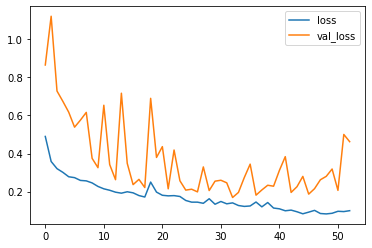

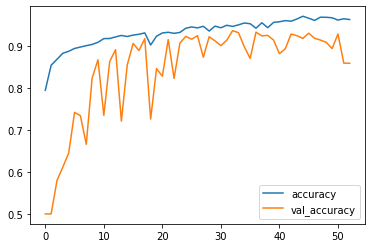

In [ ]:
history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['train_loss', 'val_loss']].plot()
history_frame.loc[:, ['train_accuracy', 'val_accuracy']].plot()

model khá ổn, ko xảy ra hiện tượng overfitting

In [ ]:
model.evaluate(training_set)

40/40 [==============================] - 80s 2s/step - loss: 0.2695 - accuracy: 0.8952


[0.26947787404060364, 0.8952105045318604]

In [ ]:
model.evaluate(test_set)

10/10 [==============================] - 17s 2s/step - loss: 0.4622 - accuracy: 0.8584


[0.46224716305732727, 0.8583999872207642]

với đề tài khá rộng: Food, Non Food, acc của test = 0.85 là khá ổn

### **Save model**

In [ ]:
# # save model
from tensorflow.keras.models import load_model
# Creates a HDF5 file 'my_model_CNN_new.h5'
model.save('LDS8_K275_DinhVietTrung_Cuoi_ky/model/food_non_food_CNN.h5')
print("save!!!")

save!!!


In [6]:
%pwd

'/content/gdrive/MyDrive/LDS8_K275_ONLINE_DinhVietTrung'

In [7]:
from keras.models import load_model
# classifier = load_model('LDS8_K275_ONLINE_DinhVietTrung/model/food_non_food_CNN.h5')
classifier = load_model('LDS8_K275_DinhVietTrung_Cuoi_ky/model/food_non_food_CNN.h5')

### **Prediction**

In [ ]:
# from PIL import Image
# import requests

# def get_imgURL(url): 
#     im = Image.open(requests.get(url, stream=True).raw)
#     size = (width, height)
#     im = im.resize(size)
#     # imgplot = plt.imshow(im)
#     # plt.show()

#     img_array = np.asarray(im)
#     img_array = tf.expand_dims(img_array,0)
#     return img_array

In [ ]:
# url = 'https://img.lovepik.com/photo/50118/2932.jpg_wh860.jpg'
# img1 = get_imgURL(url)
# score = classifier.predict(img1)
# score

array([[1.]], dtype=float32)

In [8]:
import matplotlib.image as mpimg


In [9]:
def print_result(test_image, model):
    test_image = image.img_to_array(test_image)
    print(test_image.shape)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    print(test_image.shape)
    result = model.predict(test_image)
    print(result)

    if result[0][0]<0.5:
        prediction = 'food'
    else:
        prediction = 'non food'
    print(prediction)


In [10]:
import matplotlib.image as mpimg
def img_prediction(path, model, size_img):
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()
    test_image = image.load_img(path, target_size = size_img) 
    print_result(test_image, model)

In [13]:
width = 64
height = 64

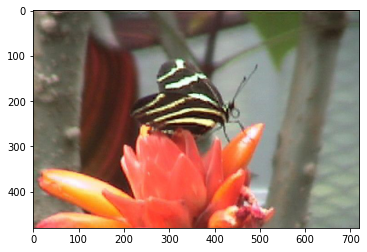

(64, 64, 3)
(1, 64, 64, 3)
[[0.99995625]]
non food


In [14]:
path = 'data/data_food_non_food/evaluation/0_25.jpg'
img_prediction(path, classifier, (width, height))

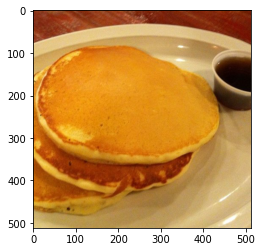

(64, 64, 3)
(1, 64, 64, 3)
[[4.440567e-05]]
food


In [15]:
path = 'data/data_food_non_food/evaluation/1_25.jpg'
img_prediction(path, classifier, (width, height))

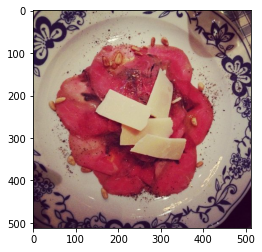

(64, 64, 3)
(1, 64, 64, 3)
[[0.40787226]]
food


In [16]:
path = 'data/data_food_non_food/evaluation/1_30.jpg'
img_prediction(path, classifier, (width, height))

In [17]:
'''
khá ổn đó nhỉ:))
'''

'\nkhá ổn đó nhỉ:))\n'